# Climate Change Impact Analysis

To highlight the impacts of climate change on our catchment we can calculate a set of indicators frequently used in climate impact studies. In this notebook we will...

1. ...calculate **meterological and hydrological statistics** for our modelling results,

2. ...plot these climate change indcators **interactive applications** to explore the impacts.

We start by reading paths and MATILDA outputs again.

In [1]:
from tools.helpers import pickle_to_dict, parquet_to_dict,read_yaml
import configparser
import os

# read output directory from config.ini file
config = configparser.ConfigParser()
config.read('config.ini')
dir_output = config['FILE_SETTINGS']['DIR_OUTPUT']
dir_input = config['FILE_SETTINGS']['DIR_INPUT']
settings = read_yaml(os.path.join(dir_output, 'settings.yml'))

# set the file format for storage
compact_files = config.getboolean('CONFIG','COMPACT_FILES')

print("Importing MATILDA scenarios...")

if compact_files:
    # For size:
    matilda_scenarios = parquet_to_dict(f"{dir_output}cmip6/adjusted/matilda_scenarios_parquet")
else:
    # For speed:
    matilda_scenarios = pickle_to_dict(f"{dir_output}cmip6/adjusted/matilda_scenarios.pickle")

Importing MATILDA scenarios...


This module calculates the following statistics for all ensemble members in annual resolution:

- Month with minimum/maximum precipitation
- Timing of Peak Runoff
- Begin, End, and Length of the melting season
- Potential and Actual Aridity
- Total Length of Dry Spells
- Average Length and Frequency of Low Flow Events
- Average Length and Frequency of High Flow Events
- 5th Percentile of Total Runoff
- 50th Percentile of Total Runoff
- 95th Percentile of Total Runoff
- Climatec Water Balance
- SPI (Standardized Precipitation Index) and SPEI (Standardized Precipitation Evapotranspiration Index) for 1, 3, 6, 12, and 24 months

For details on these metrics check the [source code](tools/indicators.py).

In [2]:
from tools.indicators import cc_indicators
from tqdm import tqdm
import pandas as pd
from tools.helpers import dict_to_pickle, dict_to_parquet, calculate_indicators

print("Calculating Climate Change Indicators...")
matilda_indicators = calculate_indicators(matilda_scenarios)
print("Writing Indicators To File...")

if compact_files:
    dict_to_parquet(matilda_indicators, f"{dir_output}cmip6/adjusted/matilda_indicators_parquet")
else:
    dict_to_pickle(matilda_indicators, f"{dir_output}cmip6/adjusted/matilda_indicators_pickle")

Calculating Climate Change Indicators...


SSP2:   0%|          | 0/31 [00:00<?, ?it/s]

SSP5: 100%|██████████| 31/31 [00:09<00:00,  3.22it/s]

Writing Indicators To File...


In [3]:
import shutil

# refresh `output_download.zip` with data retrieved within this notebook
shutil.make_archive('output_download', 'zip', 'output')
print('Output folder can be download now (file output_download.zip)')

Output folder can be download now (file output_download.zip)


Similar to the last notebook we write a function to **create customs dataframes for individual indicators** across all ensemble members ... and write a plot function for a single plot.

In [4]:
from tools.indicators import indicator_vars
from tools.plots import plot_ci_indicators
    

plot_ci_indicators(var = 'potential_aridity', dic = matilda_indicators, plot_type='line', show=True)

Finally, we can launch the interactive `Dash` app to analyze the climate change impacts.

In [5]:
# from tools.helpers import adjust_jupyter_config

# # retrieve server information to find out whether it's running locally or on mybinder.org server
# adjust_jupyter_config()

In [ ]:
from tools.plots import matilda_indicators_dash
from dash import Dash
from jupyter_server import serverapp


app = Dash(__name__)
matilda_indicators_dash(app, matilda_indicators)

port = 8052
if list(serverapp.list_running_servers()) == []:
    app.run(port=port, jupyter_mode="external")
else:
    app.run(port=port)

Dash app running on http://127.0.0.1:8052/


total_runoff extracted for SSP2
total_runoff extracted for SSP5
actual_evaporation extracted for SSP2
actual_evaporation extracted for SSP5
total_precipitation extracted for SSP2
total_precipitation extracted for SSP5
glacier_area extracted for SSP2
glacier_area extracted for SSP5
snow_melt_on_glaciers extracted for SSP2
snow_melt_on_glaciers extracted for SSP5
ice_melt_on_glaciers extracted for SSP2
ice_melt_on_glaciers extracted for SSP5
melt_off_glaciers extracted for SSP2
melt_off_glaciers extracted for SSP5
Creating MATILDA summary plot...
Plotting glacierized area...
Plotting snow & ice melt...
Plotting runoff & precipitation...
Plotting temperature...


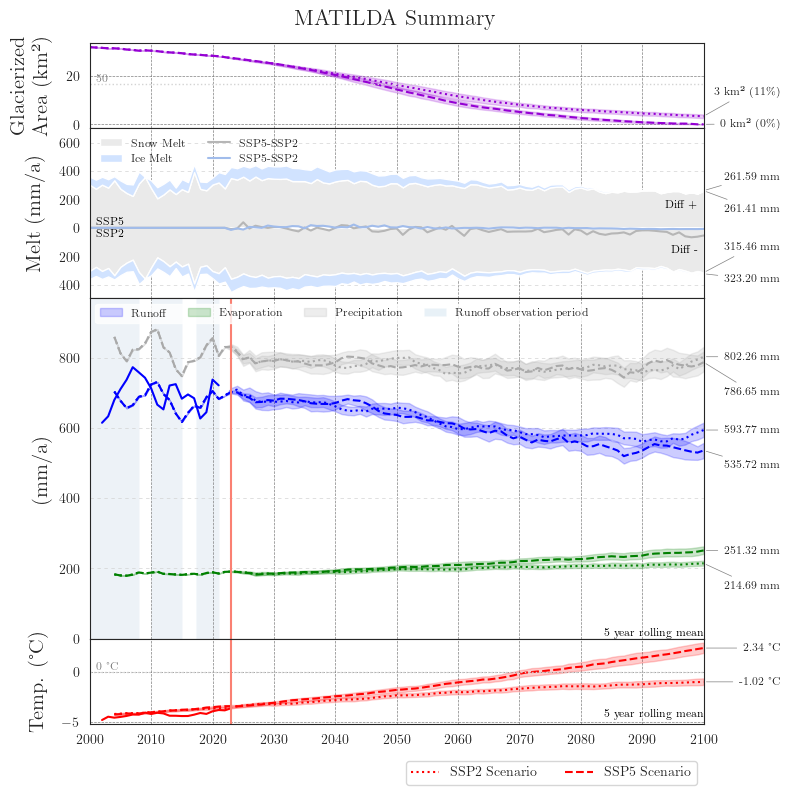

In [7]:
from tools.plots import MetaPlot

metaplot = MetaPlot(dir_input, dir_output, settings)
metaplot.load_data()

metaplot.plot_summary(rolling=5, save_path=None);